Epoch 0, Loss: 96.4264
Epoch 20, Loss: 0.9596
Epoch 40, Loss: 0.8290
Epoch 60, Loss: 0.7220
Epoch 80, Loss: 0.6343
Epoch 100, Loss: 0.5625
Epoch 120, Loss: 0.5036
Epoch 140, Loss: 0.4553
Epoch 160, Loss: 0.4158
Epoch 180, Loss: 0.3834


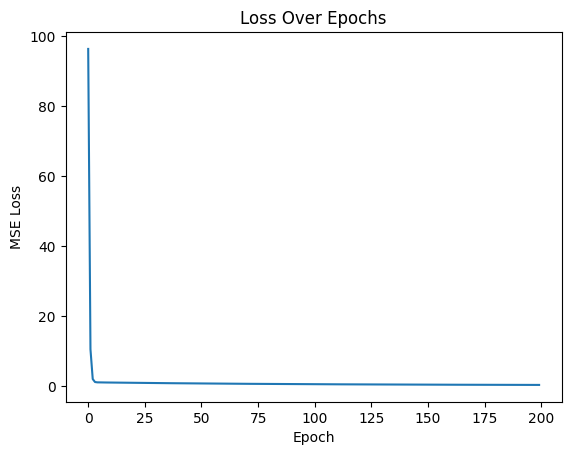

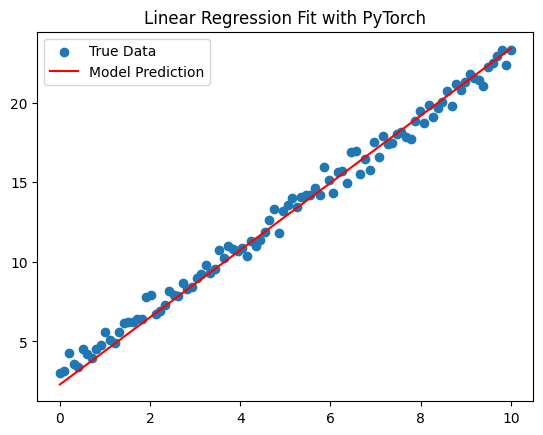

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Step 1: Create sample data
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + torch.randn(X.shape) * 0.5  # add small noise

# Step 2: Define a simple neural network
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # input=1, output=1
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Step 3: Define loss & optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Training loop
epochs = 200
losses = []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    # Backward pass
    optimizer.zero_grad()  # reset gradients
    loss.backward()        # compute gradients
    optimizer.step()       # update weights
    
    losses.append(loss.item())
    
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Step 5: Visualize training progress
plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Step 6: Visualize predictions
preds = model(X).detach()
plt.scatter(X, y, label="True Data")
plt.plot(X, preds, color="red", label="Model Prediction")
plt.legend()
plt.title("Linear Regression Fit with PyTorch")
plt.show()
